# Introdução sobre Transportadores
## Função Biológica
Os transportadores fazem parte do conjunto das macromoléculas das proteínas. Este conjunto de proteínas é
responsável por mediar o fluxo de solutos de entrada ou saida do citoplasma da celular pela membrana citoplasmática.
 Estes solutos podem variar desde iões a moléculas ou drogas, mantendo a homeostase celular.
Para acrescentar, o transporte ocorre de duas formas: transporte ativo ou transporte passivo. O transporte
passivo realiza-se com o intuito de facilitar o equilíbrio de substrato entre os dois espaços, o transporte
ocorre por via de difusão (através da membrana ou canais) ou facilitada a favor do seu gradiente eletroquímico.
No entanto o transporte ativo realiza-se com o intuito de acumular um substrato em um dos espaços, contrariando
o gradiente químico. Os transportadores ativos copulam o movimento de outro substrato a favor do gradiente químico
com o soluto a concentrar, dependendo da direção em que este substrato é concentrado podem ser classificados
com simportes e antiportes.

## Classes de transportadores
De modo a classificar os diferentes transportadores, a Transporter Classification Database (TCDB) classificou
os transportadores segundo um sistema de 5 níveis que segue a estrutura de N1.L1.N2.N3.N4. Os N são números e L
são letras. O N1 representa a principal classe do transportador, atualmente existem 9 classes: 1: Canais ou Poros;
2: Transportadores guiados pelo gradiente químico; 3: Transportadores ativos primários; 4: Grupos de
translocadores; 5: Portadores de eletrões transmembranares; 6 e 7: Não definido; 8: Fatores acessórios;
9: Sistemas de transportadores caraterizados incompletamente. O L1 representa a subclasse da classe, N2 a
família/superfamília, N3 a subfamília e N4 a sub-subfamília.

## Propythia Package
O Propythia é uma plataforma genérica modular semi-automatizada que contém funções de classificação de proteínas
baseando-se nas suas propriedades físico-químicas usando Machine-Learning e Deep-Learning.
Este package procura facilitar as tarefas necessárias para machine learning e inclui modelos para leitura e
alteração de sequências, determinação de diferentes tipos de descritores de proteínas, pré-processamento de
datasets, FeatureSelection, redução de dimensionalidade, visualização t-SNE e UMAP, clustering, treino e
optimização de modelos de machine-learning e deep-learning, bem como algorítmos de previsão.

---
## Imports

In [1]:
import numpy as np
import pandas as pd
from Util import histogram, barplot_counts, barplot_frequency, Calc_feature, Hotencoding
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

---
# Carregamento do dataset
Neste passo foi carregado o dataset e foram anotadas as suas features.

In [2]:
df = pd.read_csv('DataDoms.csv', sep= ',')
list(df.columns)

['Unnamed: 0',
 'Fasta ID',
 'Uniprot Accession',
 'Sequence',
 'Is transporter?',
 'TCDB ID',
 'Taxonomy Domain']

O dataset que irá ser usado será constituido com a:
* Sequência dos transportadores ('Sequence');
* Classificação binária de transportador ('Is transporter?')
* Classificação atribuída pela TCDB ('TCDB ID')

Estas serão as features principais que iremos usar para todas as futuras análises.

In [3]:
df_trans = df.iloc[:,3:6].copy()
df_trans.columns = ['sequence', 'transporter','TCDB_ID'] #making features more callable
df_trans

,sequence,transporter,TCDB_ID
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,0,0
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,0,0
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,0,0
3,MIHFTKMHGLGNDFMVVDGVTQNVFFSPEQIRRLADRNFGIGFDQL...,0,0
4,MGSSTTEPDVGTTSNIETTTTLQNKNVNEVDQNKKSEQSNPSFKEV...,0,0
...,...,...,...
33831,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,1,1.M.2.1.3
33832,MISIGLPNILKACLGYIVIVLMDAIWLPFATYMEFYPKLDDTHILF...,1,9.B.309.1.5
33833,MKQHCSSILNTLPPHRLMALDVMRGLTITAMILVNNPGSWSAMYWP...,1,9.B.169.4.5
33834,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,1,2.A.119.3.4


In [4]:
groups = df_trans.groupby('transporter').size()
groups

transporter
0    16918
1    16918
dtype: int64

O dataset é composto por um total de 33 836 sequências das quais 16918 são transportadores(1) e outros 16918
são não transportadores(0).
Em futuras análises será obtido uma previsão da classe principal do transportador através da utilização de descritores das sequências.

In [5]:
seqs = df_trans.iloc[:,0].tolist()
df_trans.TCDB_ID = df_trans.TCDB_ID.apply(lambda x: x[0])  # Alteração para guardar apenas o N1
groups = df_trans.groupby('TCDB_ID').size()
groups

TCDB_ID
0    16918
1     4667
2     4045
3     3944
4      409
5      203
8      888
9     2749
A        3
O        1
P        2
W        3
X        4
dtype: int64

Através do agrupamento pela classe principal do transportador registamos que existem sequências associadas a
classes como A,O,P,W,X que não são classes reais (devem ser removidas).Do mesmo modo, sequências associadas à
classe 9 serão também excluídas do dataset, porque esta classe contêm sistemas de transportadores não caraterizados.

Sendo de seguida filtrado o dataset.

---
# Filtragem do dataset
## Remoção de sequencias com classes erráticas

In [6]:
filter_list = ['0', '1', '2','3','4','5','8']
df_trans = df_trans[df_trans.TCDB_ID.isin(filter_list)]
print(f'Were removed {df.shape[0]-df_trans.shape[0]} amino acid sequences from the dataset.')
print(f'Df = {df.shape} | Df_cleaned = {df_trans.shape}')


Were removed 2762 amino acid sequences from the dataset.
Df = (33836, 7) | Df_cleaned = (31074, 3)


## Verificação da existencia de duplicados

In [7]:
duplicateRowsDF = df_trans[df_trans.duplicated(['sequence'])]
count= 0
for i in range(duplicateRowsDF.shape[0]):
    var = duplicateRowsDF['sequence'].iloc[i]
    for j in range(i,duplicateRowsDF.shape[0]):
        if var == duplicateRowsDF.sequence.iloc[j]:
            if duplicateRowsDF.TCDB_ID.iloc[i] != duplicateRowsDF.TCDB_ID.iloc[j]:
                count +=1
print('Number of sequences with more then one class id:',count)


Number of sequences with more then one class id: 0


No total existem 452 entradas no dataset em que a sequência encontra-se repetida! Com ciclo for verificamos
que para sequências iguais não lhes é atribuído uma classe diferente pelo TCDB, deste modo podemos remover as
sequências repetidas mantendo sempre a última entrada dessa sequência.
## Remoção de duplicados

In [8]:
orig = df_trans.shape
df_trans = df_trans.drop_duplicates(subset=['sequence'], keep= 'last')
print('Original Dataset shape: ', orig,'\nNon-duplicate Dataset shape: ', df_trans.shape)

Original Dataset shape:  (31074, 3) 
Non-duplicate Dataset shape:  (30622, 3)


## Verificação das sequências proteicas
De seguida, todas as sequências foram verificadas segundo a função protein_check do package ProPythia.

Esta função permite identificar sequências que contenham aminoácidos ambíguos ou aminoácidos que não estejam
incluidis na lista de 20 aminoácidos "standart", sendo estas sequências posteriormente removidas do dataset. O
dataset sem sequências inválidas será guardado para formato .csv.

In [9]:
from propythia.adjuv_functions.sequence.pro_check import protein_check
df_clean = df_trans.copy().reset_index(drop=True)
remove_rows = 0
for index in range(df_trans.shape[0]):
    if protein_check(df_trans.sequence.iloc[index]) == 0:
        df_clean.drop(index= index,axis = 0,inplace=True)
        remove_rows+= 1

print(f'Were removed {remove_rows} uncertain amino acid sequences from the dataset.')
print(f'Df = {df_trans.shape} | Df_cleaned = {df_clean.shape}')

df_clean.iloc[:3,:]



Were removed 117 uncertain amino acid sequences from the dataset.
Df = (30622, 3) | Df_cleaned = (30505, 3)


,sequence,transporter,TCDB_ID
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,0,0
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,0,0
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,0,0


---
# Features
## Feature calculation
O próximo passo com o dataset filtrado e selecionado foi o cálculo dos descritores das sequências proteicas.
Para tal, foi utilizado a função adapAATra da classe Descriptor permitindo o cálculo de múltiplos descritores
presentes no package, dado origem a um dataset com a informação dos descritores.

(Aviso: Não correr processo, processo demora cerca de 4h com recurso de 5 cores no CPU. Informação resoltante deste processo pode ser encontrada no Features.csv)

In [10]:
# from Features import Calc_feature
#
# fea = Calc_feature(df_clean, 'sequence',[19, 20, 21, 24, 26, 32], 'Features.csv')
# fea.run()
# fea.toDataframe()

Estes descritores são referentes a propriedades físico-químicas (como a polaridade, carga, conteudo de enxofre,
entre outras) e estruturais (como a frequência dos diferentes aminoácidos e diferentes ligações aa-aa presentes
na sequência) que se consegue determinar a partir das diferentes sequências proteicas.

## Análise exploratória das features

In [11]:
df_fea = pd.read_csv('Features.csv', sep= ',')
df_fea = df_fea.drop('Unnamed: 0', 1)
df_fea

,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,126.0,4.034,3.079204e-04,569,905,159,181,6,2119,...,2.740,28.767,57.534,101.370,172.603,3.846,169.231,296.154,380.769,450.000
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,489.0,-14.152,-2.539340e-04,2438,3878,654,785,15,8946,...,1.333,91.333,160.000,234.667,325.333,0.694,68.056,160.417,247.222,337.500
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,240.0,-3.983,-1.550475e-04,1109,1754,312,360,9,4154,...,1.852,51.852,117.593,173.148,222.222,1.538,84.615,163.077,261.538,355.385
3,MIHFTKMHGLGNDFMVVDGVTQNVFFSPEQIRRLADRNFGIGFDQL...,275.0,-0.697,-2.289178e-05,1330,2079,365,413,14,4928,...,3.191,81.915,158.511,228.723,288.298,1.099,53.846,141.758,216.484,302.198
4,MGSSTTEPDVGTTSNIETTTTLQNKNVNEVDQNKKSEQSNPSFKEV...,426.0,5.166,1.067265e-04,2025,3145,565,746,12,7641,...,1.227,87.117,142.331,199.387,261.350,1.064,95.745,207.447,325.532,443.617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30500,MPEGKFCNRKPVNTEEDLKALLGDKGGAQYYKEMEELEVDQEALWA...,461.0,-13.083,-2.481132e-04,2312,3540,624,700,38,8551,...,1.258,81.761,151.572,207.547,288.050,0.685,79.452,145.205,232.877,312.329
30501,MQHANTNKSLMTPGNIITGIILVMGLVLTVLRFTKGIGAVSNLDDN...,388.0,4.014,9.299716e-05,2024,3077,487,516,19,7056,...,1.974,58.553,122.368,184.211,255.263,0.581,59.302,113.953,169.767,219.767
30502,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,134.0,0.036,2.610495e-06,588,977,163,205,4,2237,...,6.667,60.000,121.667,165.000,223.333,2.564,30.769,151.282,279.487,325.641
30503,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,390.0,2.890,6.803041e-05,1968,3049,455,539,16,7031,...,3.268,67.320,133.333,203.922,254.248,0.592,55.621,117.751,170.414,230.769


Para cada sequência foram obtidas 640 features a partir da sua sequência proteica. 

### Histograma do comprimento das sequências

Tamanho máxido registado:  1000.0
Tamanho minimo registado:  20.0
Media do comprimento das sequência:  345.0


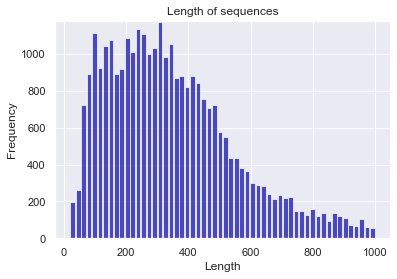

In [12]:
histogram(df_fea.lenght, 'Length of sequences', 'Length')
print('Tamanho máxido registado: ', max(df_fea.lenght))
print('Tamanho minimo registado: ', min(df_fea.lenght))
print('Media do comprimento das sequência: ', np.mean(df_fea.lenght).round())

### Distribuição dos datasets

* O Dataset df_feaTra será usado para determinar se uma sequência de aminoácidos de uma proteína poderá ser uma
proteína transportadora ou não (classificação binária), tendo em conta as diferentes propriedades registadas pelo "Feature calculation".

In [13]:
df_feaTra= df_clean.iloc[:,[0,1]].merge(df_fea, how= 'left', on = 'sequence')
df_feaTra = df_feaTra.astype({"transporter": int})  
df_feaTra.iloc[:3,:]

,sequence,transporter,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,0,126.0,4.034,0.000308,569,905,159,181,6,...,2.740,28.767,57.534,101.370,172.603,3.846,169.231,296.154,380.769,450.000
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,0,489.0,-14.152,-0.000254,2438,3878,654,785,15,...,1.333,91.333,160.000,234.667,325.333,0.694,68.056,160.417,247.222,337.500
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,0,240.0,-3.983,-0.000155,1109,1754,312,360,9,...,1.852,51.852,117.593,173.148,222.222,1.538,84.615,163.077,261.538,355.385


* O Dataset df_feaTCDB será usado para determinar a classe de transportador de uma proteína (Classificação multiclasse), tendo em conta
as diferentes propriedades registadas pelo "Feature calculation".

In [14]:
df_feaTCDB = df_clean.iloc[:,[0,2]].merge(df_fea, how= 'left', on = 'sequence')
df_feaTCDB = df_feaTCDB.astype({"TCDB_ID": int})
df_feaTCDB.iloc[:3,:]

,sequence,TCDB_ID,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,0,126.0,4.034,0.000308,569,905,159,181,6,...,2.740,28.767,57.534,101.370,172.603,3.846,169.231,296.154,380.769,450.000
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,0,489.0,-14.152,-0.000254,2438,3878,654,785,15,...,1.333,91.333,160.000,234.667,325.333,0.694,68.056,160.417,247.222,337.500
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,0,240.0,-3.983,-0.000155,1109,1754,312,360,9,...,1.852,51.852,117.593,173.148,222.222,1.538,84.615,163.077,261.538,355.385


### Contagem de Proteínas Transportadoras e Proteínas Não Transportadoras (df_feaTra) e contagem do elementos de cada Classe de Transportadores (df_feaTCDB)

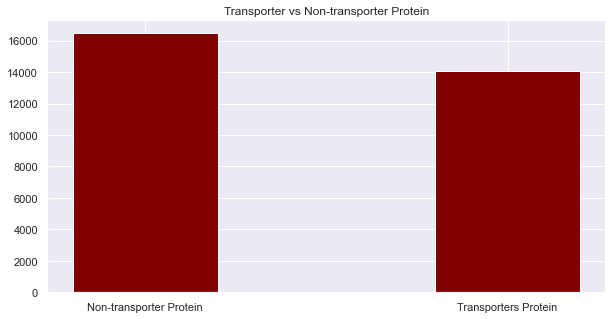

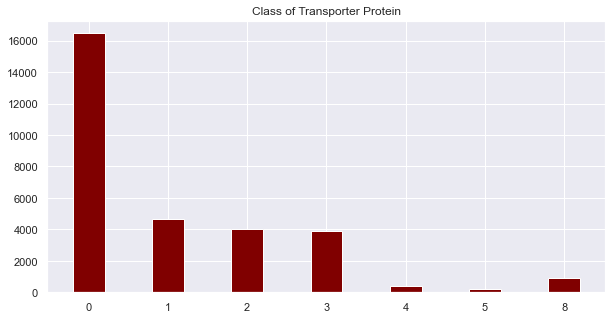

In [15]:
ContTra = df_feaTra.groupby('transporter').size()
ContTra.index = ['Non-transporter Protein', 'Transporters Protein']
ContTCDB = df_feaTCDB.groupby('TCDB_ID').size()
ContTCDB.index = [ str(i) for i in list(ContTCDB.index)]

barplot_counts(list(ContTra.index), list(ContTra.values), 'Transporter vs Non-transporter Protein')
barplot_counts(list(ContTCDB.index), list(ContTCDB.values),  'Class of Transporter Protein')

Através dos gráficos verifica-se uma distribuição desigual entre as classes. No gráfico *"Transporter vs Non-transporter Protein"* é possível verificar uma maior frequência das proteínas não transportadoras (*Non-transporter*). No gráfico *"Class of Transporter Protein"* verfica-se a maior representabilidade da Classe 0, sendo que classes como a classe 4 e 5 têm uma frequência muito inferior às restantes classes.


### Distribuição média dos AA
Estes dados darão uma prespetiva simples sobre a frenquência dos diferentes aminoácidos nos diferentes
tipos de Proteínas, quer seja na sua distribuição em proteinas transportadoras e não transportadores,
ou na distruição destes nas diferentes classes de transportadores.

A representação gráfica é realizada não servirá para tirar conclusões concretas sobre possíveis previsões,
contudo oferecem uma base para interpretações nóveis sobre o Dataset em análise.

* Distruição média de AA de Proteínas Transportadoras e Não Transportadoras

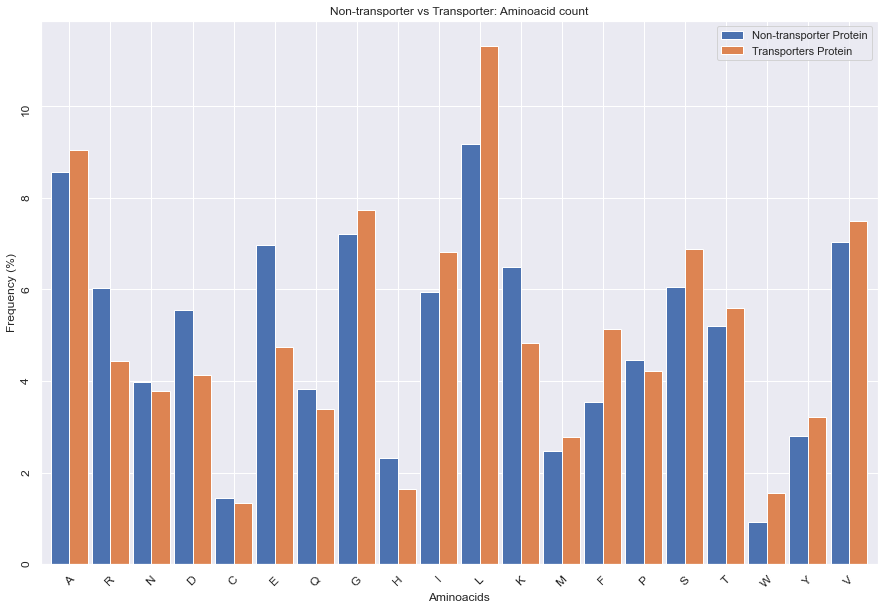

In [16]:
df_feaTra.iloc[:,26:46].columns.to_list()
AATra = df_feaTra.groupby('transporter').mean().loc[:, 'A':'V']
AATra.apply(lambda x: sum(x), axis=1)
AATra.index = ['Non-transporter Protein', 'Transporters Protein']

barplot_frequency(AATra.T, xlabel='Aminoacids', ylabel='Frequency (%)', title='Non-transporter vs Transporter: Aminoacid count')

* Distribuição média de diferentes AA presentes nas diferentes Classes de Proteínas Transportadoras

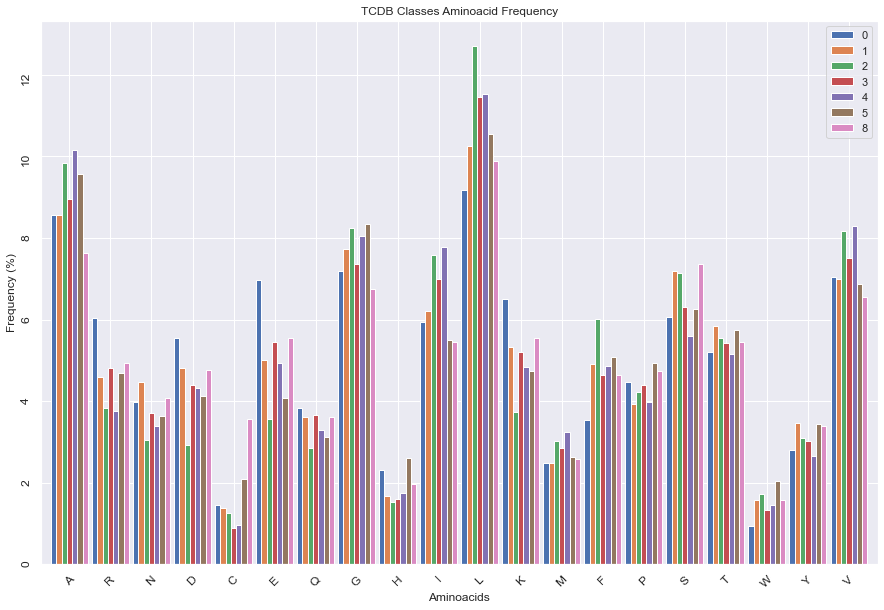

In [17]:
AATCDB =df_feaTCDB.groupby('TCDB_ID').mean().loc[:,'A':'V']
barplot_frequency(AATCDB.T, xlabel='Aminoacids', ylabel='Frequency (%)', title='TCDB Classes Aminoacid Frequency')

Em ambos os casos verifica-se uma diferença na frequência dos aminoácidos entre as várias classes, no entanto está diferença pode ou não dever-se a propriedades das diferentes classe. 

# Feature selection
Através dos dados dos descritores foi realizada a seleção das features (descritores) que aparentam diferençar a classe binária das sequências (transportador ou não transportador) e entre as várias classes de transportadores. Para a realização de tal passo foi utilizado o modulo FeatureSelection do package ProPythia após a standartização dos datasets segundo o Standart Scaler do package Sklearn.

Na utilização do módulo do FeatureSelection do package Propythia, foi realizada a análise univariada das features utilizando a função mutual_classification, uma vez que os nossos dados são discretos. A função mutual_classification utiliza métodos não paramétricos baseados na estimativa dos k-vizinhos mais próximos. A partir desta análise univariada as features foram ordenadas de modo descendente pelo seu k-score.
Foi selelcionado o top 20 das features com o maior ranking score (k score) com o objetivo de comparação entre as várias Feacture Selection.
## Classificação Binária
A Standartização e a Feature Selection para a classificação binária foi realidade considerando a totalidade do dataset.

In [18]:
df_feaTra[list(df_feaTra.columns[2:])] = StandardScaler().fit_transform(df_feaTra[list(df_feaTra.columns[2:])])
from propythia.feature_selection import FeatureSelection
fsTra = FeatureSelection(x_original=df_feaTra.iloc[:,2:],
                 target=df_feaTra.transporter,
                 columns_names=None,
                 dataset=df_feaTra.iloc[:,2:])

transformer, x_fit_univariate, x_transf_univariate, column_selected, scores, scores_df = fsTra.run_univariate(
    score_func=mutual_info_classif, mode='k_best',param = 640)
fsTra.scores_ranking(scores)
print('Top 20 of features ranking: ')
list(fsTra.scores_ranking(scores).index[0:20])

original X dataset shape: (30505, 640)
New X dataset shape: (30505, 640)
number of column selected: (640,)
scores:                       scores_ranking
bomanindex                  0.182763
_ChargeD2100                0.180780
_HydrophobicityD3100        0.179361
Gravy                       0.178473
_HydrophobicityD1100        0.176987
...                              ...
HQ                          0.000000
HW                          0.000000
WD                          0.000000
QY                          0.000000
SG                          0.000000

[640 rows x 1 columns]
Finished 'run_univariate' in 93.0773 secs
Top 20 of features ranking: 


['bomanindex',
 '_ChargeD2100',
 '_HydrophobicityD3100',
 'Gravy',
 '_HydrophobicityD1100',
 '_ChargeC2',
 '_SolventAccessibilityD2100',
 '_ChargeD2075',
 '_HydrophobicityD1075',
 '_SolventAccessibilityD2075',
 '_HydrophobicityC3',
 '_PolarityD1100',
 '_SolventAccessibilityC2',
 '_SolventAccessibilityT12',
 '_HydrophobicityD3075',
 '_HydrophobicityC1',
 'SecStruct_helix',
 '_ChargeD2050',
 '_PolarityD1075',
 '_PolarityC1']

Relativamente ao top 20 de features selecionadas para a classificação binária consoante os
seus rankings score, é possível verificar que todas elas representam características importantes
para a identificação de uma proteína transportadora. A "bomanindex" é uma estimativa que permite
verificar o potencial de ligação de uma proteína; a "charge" representa a capacidade da proteína
produzir energia sub a forma de ATP ou outros metabolitos provenientes de reações redox que
posteriormente poderá ser utilizada por outras proteínas transportadoras secundárias;
"Solvent Acessibility" é uma feature importante nas proteínas uma vez que permite determinar a
estabilidade da proteína bem como o folding; "Gravy" é um índice que
identifica a hidrofobicidade de proteínas, isto é, uma proteína que apresente um índice de
Gravy acima de 0, será muito provavelmente uma proteína hidrofóbica, vice-versa; a Hidrofobicidade é
caracterizada pela afinidade entre a àgua e a cadeia de aminoácidos correspondentes da proteína,
significando que uma proteína com um elevado grau de hidrofobicidade apresenta uma normalmente
uma polaridade negativa.

## Classificação multiclasse
### Classificação multiclasse balanceada
De modo a balancear o dataset, foi reduzido o número de entradas para a Class 0 de transportadores. Como anteriormente verificado a Classe 0 representava mais de 50% das entradas no dataset original.
Esta discrepância no número de entradas poderá levar à inconsistência das análises, inviabilizando assim os resultados obtidos posteriormente.
Ao dataset gerado foi aplicada a Standartização e a Feature Selection.

In [19]:
def sampling_k_elements(group, k=4000):
    if len(group) < k+1000:
        return group
    return group.sample(k)

df_feaTCDB_blc= df_feaTCDB.groupby('TCDB_ID').apply(sampling_k_elements).reset_index(drop=True)
df_feaTCDB_blc[list(df_feaTCDB_blc.columns[2:])] = StandardScaler().fit_transform(df_feaTCDB_blc[list(df_feaTCDB_blc.columns[2:])])
fsTCDB_blc = FeatureSelection(x_original=df_feaTCDB_blc.iloc[:,2:],
                 target=df_feaTCDB_blc.TCDB_ID,
                 columns_names=None,
                 dataset= df_feaTCDB_blc.iloc[:,2:])

transformer2, x_fit_univariate2, x_transf_univariate2, column_selected2, scores2, scores_df2 = fsTCDB_blc.run_univariate(
    score_func=mutual_info_classif, mode='k_best', param=640)
fsTCDB_blc.scores_ranking(scores2)
print('Top 20 of features ranking')
list(fsTCDB_blc.scores_ranking(scores).index[0:20])

original X dataset shape: (18048, 640)
New X dataset shape: (18048, 640)
number of column selected: (640,)
scores:                             scores_ranking
_ChargeD2100                      0.236966
bomanindex                        0.228501
Gravy                             0.226588
_ChargeC2                         0.226055
_SolventAccessibilityD2100        0.225099
...                                    ...
HH                                0.003791
KW                                0.003688
WE                                0.003102
MH                                0.002597
WH                                0.001939

[640 rows x 1 columns]
Finished 'run_univariate' in 53.0772 secs
Top 20 of features ranking


['bomanindex',
 '_ChargeD2100',
 '_HydrophobicityD3100',
 'Gravy',
 '_HydrophobicityD1100',
 '_ChargeC2',
 '_SolventAccessibilityD2100',
 '_ChargeD2075',
 '_HydrophobicityD1075',
 '_SolventAccessibilityD2075',
 '_HydrophobicityC3',
 '_PolarityD1100',
 '_SolventAccessibilityC2',
 '_SolventAccessibilityT12',
 '_HydrophobicityD3075',
 '_HydrophobicityC1',
 'SecStruct_helix',
 '_ChargeD2050',
 '_PolarityD1075',
 '_PolarityC1']

Quando verificado o top 20 de features selecionadas para a classificação multiclasse balanceada verificamos que este top 20 é composto pelas mesmas features que no caso anterior.

## Classificação multiclasse de transportadores
Com o intuito verificar a eficácia dos métodos de análise não supervisionada para individualização das restantes classes de transportadores, foi gerado um dataset apenas de transportares (removendo todos elementos da classe 0).
Ao dataset gerado foi aplicada a Standartização e a Feature Selection.

In [20]:
df_feaTCDB_nz= df_feaTCDB[df_feaTCDB.TCDB_ID != 0]
df_feaTCDB_nz[list(df_feaTCDB_nz.columns[2:])] = StandardScaler().fit_transform(df_feaTCDB_nz[list(df_feaTCDB_nz.columns[2:])])
fsTCDB_nz = FeatureSelection(x_original=df_feaTCDB_nz.iloc[:,2:],
                 target=df_feaTCDB_nz.TCDB_ID,
                 columns_names=None,
                 dataset= df_feaTCDB_nz.iloc[:,2:])

transformer3, x_fit_univariate3, x_transf_univariate3, column_selected3, scores3, scores_df3 = fsTCDB_nz.run_univariate(
    score_func=mutual_info_classif, mode='k_best', param=640)
fsTCDB_nz.scores_ranking(scores2)
print('Top 20 of features ranking')
list(fsTCDB_nz.scores_ranking(scores).index[0:20])

original X dataset shape: (14048, 640)
New X dataset shape: (14048, 640)
number of column selected: (640,)
scores:                             scores_ranking
_HydrophobicityD1100              0.156683
_ChargeD2100                      0.156238
_SolventAccessibilityD2100        0.155588
hydrophobic_ratio                 0.152627
_SolventAccessibilityC2           0.151403
...                                    ...
HR                                0.004137
NH                                0.002787
YH                                0.002038
HN                                0.001619
HK                                0.001604

[640 rows x 1 columns]
Finished 'run_univariate' in 42.9220 secs
Top 20 of features ranking


['bomanindex',
 '_ChargeD2100',
 '_HydrophobicityD3100',
 'Gravy',
 '_HydrophobicityD1100',
 '_ChargeC2',
 '_SolventAccessibilityD2100',
 '_ChargeD2075',
 '_HydrophobicityD1075',
 '_SolventAccessibilityD2075',
 '_HydrophobicityC3',
 '_PolarityD1100',
 '_SolventAccessibilityC2',
 '_SolventAccessibilityT12',
 '_HydrophobicityD3075',
 '_HydrophobicityC1',
 'SecStruct_helix',
 '_ChargeD2050',
 '_PolarityD1075',
 '_PolarityC1']

Quando verificado o top 20 de features selecionadas para a classificação das classes de
transportadores verificamos que o top 20 das features não se alteram em comparação com as acima descritas.

# Seleção dos datasets baseado na Feature Selection
Para a análise não supervisionada foram definidos três datasets para as classificações a realizar (classificação binária, classificação multiclasse, classificação multiclasse de transportadores).
Estes datasets foram gravados sobre formato.csv, em que as duas primeiras colunas correspondem à sequencia e à classificação, respetivamente. As restantes colunas correspondem as features ordenadas segundo o resultado obtidos na Feature Selection (k score descendente).

## Dataset para classificação binária

In [21]:
df_Tra = df_feaTra.loc[:, list(df_feaTra.columns[:2]) + list(fsTra.scores_ranking(scores).index[:])]
dici = {0:'NonTra', 1 : 'Tra'}
df_Tra.transporter = df_Tra.transporter.apply(lambda x: dici[x])
df_Tra.to_csv('df_Tra.csv')
df_Tra

,sequence,transporter,bomanindex,_ChargeD2100,_HydrophobicityD3100,Gravy,_HydrophobicityD1100,_ChargeC2,_SolventAccessibilityD2100,_ChargeD2075,...,_PolarizabilityC1,RY,EW,NF,GQ,HQ,HW,WD,QY,SG
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,NonTra,0.224854,-0.663266,2.080290,-0.728483,0.738313,0.656979,0.738313,-1.628206,...,1.498645,-0.575967,-0.368176,-0.574696,-0.685212,-0.398884,-0.241406,-0.345193,-0.479138,0.515333
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,NonTra,0.917296,1.572972,0.433034,-0.899206,-0.903760,-1.479925,-0.903760,1.628170,...,-0.473228,0.103159,0.813932,0.837994,-0.134284,-0.398884,-0.241406,-0.345193,1.386198,-0.585465
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,NonTra,0.281929,-0.436835,0.694912,-0.414872,-0.130083,0.401152,-0.130083,-0.094844,...,0.584413,-0.575967,-0.368176,0.872450,-0.685212,-0.398884,-0.241406,-0.345193,-0.479138,-0.181839
3,MIHFTKMHGLGNDFMVVDGVTQNVFFSPEQIRRLADRNFGIGFDQL...,NonTra,0.280997,-0.117689,-0.083867,-0.368043,-0.488394,0.055034,-0.488394,0.020678,...,-0.562859,-0.575967,-0.368176,0.665715,1.325675,-0.398884,-0.241406,-0.345193,-0.479138,-0.291919
4,MGSSTTEPDVGTTSNIETTTTLQNKNVNEVDQNKKSEQSNPSFKEV...,NonTra,1.574354,-0.613676,1.986828,-1.987419,-0.916583,0.611833,-0.916583,-0.260411,...,-0.939308,0.238984,-0.368176,0.252244,0.609469,5.668667,-0.241406,-0.345193,0.612766,-0.512079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30500,MPEGKFCNRKPVNTEEDLKALLGDKGGAQYYKEMEELEVDQEALWA...,Tra,0.510703,0.607386,0.064474,-0.801156,-0.557507,-0.727494,-0.557507,0.611736,...,-0.921382,-0.575967,3.473675,-0.574696,-0.079192,-0.398884,-0.241406,1.052822,1.477190,-0.548772
30501,MQHANTNKSLMTPGNIITGIILVMGLVLTVLRFTKGIGAVSNLDDN...,Tra,-1.581525,-1.315992,-1.290844,1.513113,1.822963,1.469604,1.822963,-1.377985,...,-0.401524,1.189760,2.705305,-0.574696,-0.685212,0.938034,2.072837,-0.345193,-0.479138,-0.952398
30502,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,Tra,-0.090436,-0.604466,0.259392,0.218970,0.074191,0.596784,0.074191,-0.236207,...,2.394951,-0.575967,-0.368176,-0.574696,-0.685212,-0.398884,-0.241406,-0.345193,-0.479138,1.799598
30503,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,Tra,-1.693440,-1.496199,-1.129750,1.827002,1.309433,1.710382,1.309433,-1.234283,...,-0.114706,-0.575967,-0.368176,-0.574696,0.719654,-0.398884,-0.241406,-0.345193,-0.479138,-0.016719


## Dataset para classificação multiclasse balanceado

In [22]:
df_TCDB_blc = df_feaTCDB_blc.loc[:, list(df_feaTCDB.columns[:2]) + list(fsTCDB_blc.scores_ranking(scores2).index[:])]
dici = {0:'cls0', 1 : 'cl1',2:'cl2',3:'cl3',4:'cl4',5:'cl5',8:'cl8' }
df_TCDB_blc.TCDB_ID = df_TCDB_blc.TCDB_ID.apply(lambda x: dici[x])
df_TCDB_blc.to_csv('df_TCDB_blc.csv')
df_TCDB_blc

,sequence,TCDB_ID,_ChargeD2100,bomanindex,Gravy,_ChargeC2,_SolventAccessibilityD2100,_HydrophobicityD1100,_SolventAccessibilityC2,_ChargeD2075,...,KF,CQ,HQ,KY,HM,HH,KW,WE,MH,WH
0,MTQMNVESFNLDHTKVKAPYIRLVGVTEGDKGDKIYKYDIRVKQPN...,cls0,0.759279,1.055460,-1.126033,-0.802890,-0.974398,-0.974398,1.332676,0.741912,...,-0.579766,3.428950,-0.386144,1.629340,5.032043,3.364823,-0.336860,-0.354468,-0.298901,-0.247049
1,MGRMRGEALAQEVLRLKRERNAVILAHSYQLPEVQEVADFVGDSLG...,cls0,1.112996,0.420463,-0.163105,-1.118912,-0.542919,-0.542919,0.385043,0.740938,...,-0.579766,-0.236330,-0.386144,-0.550494,-0.288766,-0.290831,-0.336860,-0.354468,-0.298901,-0.247049
2,MTRSPLRRLIFGALRRLLYLWVRSETINQSAMSLQLDRSRPVFYAL...,cls0,0.067800,0.469576,-0.276162,-0.125701,-0.402101,-0.402101,0.208152,0.164542,...,-0.579766,-0.236330,-0.386144,-0.550494,-0.288766,-0.290831,-0.336860,-0.354468,-0.298901,-0.247049
3,MSNKAWGGRFEVQPEEWVDDFNASITFDQTLINQDIEGSIAHATML...,cls0,0.254021,0.841222,-0.857528,-0.321333,-0.751149,-0.751149,0.865177,0.374152,...,0.104198,-0.236330,0.842466,-0.550494,-0.288766,2.146272,-0.336860,-0.354468,1.334128,-0.247049
4,MKQSHFFAHLSRMKLINRWPLMRNVRTENVSEHSLQVAMVAHALAA...,cls0,0.779939,0.723605,-0.671107,-0.817939,-0.860360,-0.860360,1.042068,0.521961,...,1.005787,-0.236330,-0.386144,1.133923,-0.288766,-0.290831,-0.336860,-0.354468,-0.298901,-0.247049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18043,MAKSDTSNLGYAYHLPSGGCLMRIRNALSQFSDLFSEFNRYIAPAY...,cl8,-0.314695,0.026696,0.044050,0.250516,-0.057942,-0.057942,-0.234076,-0.317937,...,0.601626,0.818827,-0.386144,0.704562,-0.288766,0.761555,0.658481,-0.354468,1.111442,-0.247049
18044,MWLSVFALQCALFAGFCFARDIRYSTGVSITLRNDAWTSPKKEPHR...,cl8,1.370975,1.452603,-1.158931,-1.344641,-0.922430,-0.922430,1.130514,1.464293,...,0.570537,1.152034,-0.386144,0.275201,-0.288766,0.373834,0.972799,1.259807,-0.298901,-0.247049
18045,MTATAKGINVMNTPLSTSQEPPIQFSTIASEFLHQQTDDVQPSGFQ...,cl8,0.344779,1.219002,-1.156709,-0.411625,-0.670283,-0.670283,0.688286,0.643615,...,-0.113427,-0.236330,1.233388,-0.550494,-0.288766,0.540000,-0.336860,-0.354468,1.853728,-0.247049
18046,MSMFNILKQVVNLNKVQLCQKSFQVNSKSFAQYSYRLNSSYILNNS...,cl8,-0.031259,0.348854,-0.441076,-0.080555,-0.636272,-0.636272,0.625110,-0.078279,...,-0.579766,1.873983,-0.386144,0.704562,-0.288766,-0.290831,1.653822,-0.354468,-0.298901,-0.247049


## Dataset para classificação multiclasse de transportadores

In [23]:
df_TCDB_nz = df_feaTCDB_nz.loc[:, list(df_feaTCDB.columns[:2]) + list(fsTCDB_nz.scores_ranking(scores3).index[:])]
df_TCDB_nz.TCDB_ID = df_TCDB_nz.TCDB_ID.apply(lambda x: dici[x])
df_TCDB_nz.to_csv('df_TCDB_nz.csv')
df_TCDB_nz

,sequence,TCDB_ID,_HydrophobicityD1100,_ChargeD2100,_SolventAccessibilityD2100,hydrophobic_ratio,_SolventAccessibilityC2,Gravy,bomanindex,_ChargeD3100,...,VH,NC,WK,EH,HH,HR,NH,YH,HN,HK
16457,MDSIRPATFQIPAAVRELGWAALLLFFVLLSVHEWFSPPGWFGLLA...,cl4,0.963098,-0.891240,0.963098,1.151802,-1.053496,0.914927,-0.888562,0.770825,...,1.530334,-0.250250,-0.380315,-0.437222,-0.289560,-0.440332,-0.392031,2.334183,-0.383786,-0.411758
16458,MSPSRTARLYFLLVLDLLFFVLEISIGYAVGSLALVADSFHMLNDV...,cl2,0.308846,-0.396637,0.308846,-0.544895,-0.597386,-0.265547,0.400992,-0.216299,...,1.530334,0.893768,-0.380315,2.535112,0.963302,2.537851,-0.392031,2.334183,0.916904,0.761645
16459,MHFGLNDRPEQVASASHSIFSSDDNKLRLSASLPDTAVTDLRRLGR...,cl2,-0.540370,0.471229,-0.540370,-0.322973,0.393026,-0.430169,0.612418,-0.605204,...,1.874961,-0.250250,0.824445,1.863940,-0.289560,3.018203,-0.392031,2.793955,-0.383786,-0.411758
16460,MFPLSALPRCVALRSKHGNSYLRSVHDKSQGGNFVELSADNDGGVM...,cl1,-0.779495,0.905993,-0.779495,-1.400136,0.823074,-1.142603,1.179043,-0.701986,...,1.579566,-0.250250,-0.380315,1.576295,-0.289560,-0.440332,-0.392031,-0.358767,0.916904,-0.411758
16461,FGFKDIIRAIRRIAVPVVSTLFPPAAPLAHAIGEGVDYLLGDEAQA,cl1,0.104314,0.179309,0.104314,1.113481,-0.467068,0.673374,-0.458626,-0.628210,...,-0.488196,-0.250250,-0.380315,-0.437222,-0.289560,-0.440332,-0.392031,-0.358767,-0.383786,-0.411758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30500,MPEGKFCNRKPVNTEEDLKALLGDKGGAQYYKEMEELEVDQEALWA...,cl5,-0.908812,1.340654,-0.908812,-0.971821,1.109772,-1.259992,1.051610,-0.880588,...,-0.488196,0.948245,-0.380315,1.624236,-0.289560,1.625182,0.910957,-0.358767,2.279532,-0.411758
30501,MQHANTNKSLMTPGNIITGIILVMGLVLTVLRFTKGIGAVSNLDDN...,cl5,1.108509,-0.915757,1.108509,0.752002,-1.144719,0.910925,-1.006250,0.611843,...,-0.488196,-0.250250,-0.380315,0.809241,1.261602,-0.440332,-0.392031,1.348958,-0.383786,1.041027
30502,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,cl1,-0.373482,-0.081031,-0.373482,-0.683305,0.106328,-0.303055,0.460346,-0.665177,...,-0.488196,-0.250250,-0.380315,-0.437222,-0.289560,-0.440332,-0.392031,-0.358767,-0.383786,-0.411758
30503,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,cl2,0.673320,-1.127166,0.673320,1.200391,-1.027433,1.205370,-1.116326,0.762407,...,-0.488196,-0.250250,0.924842,-0.437222,-0.289560,0.808584,-0.392031,-0.358767,-0.383786,-0.411758


# One-hot-encoding
De seguida foi realizada a técnica de one-hot-encoding para as sequências do dataset, com o intuito de utilizar esta feature nas próximas etapas, nomeadamente Machine Learning e Deep Learning.

In [24]:
df_enco = df_clean.copy()
cdx = Hotencoding(df_enco.sequence)
df_sequence = cdx.fit_transform()

In [25]:
df_enco.insert(len(df_enco.columns), "Hotenc",df_sequence)
df_enco.to_csv('df_enco.csv')
df_enco


,sequence,transporter,TCDB_ID,Hotenc
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,MIHFTKMHGLGNDFMVVDGVTQNVFFSPEQIRRLADRNFGIGFDQL...,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,MGSSTTEPDVGTTSNIETTTTLQNKNVNEVDQNKKSEQSNPSFKEV...,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
30617,MPEGKFCNRKPVNTEEDLKALLGDKGGAQYYKEMEELEVDQEALWA...,1,5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
30618,MQHANTNKSLMTPGNIITGIILVMGLVLTVLRFTKGIGAVSNLDDN...,1,5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
30619,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,1,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
30620,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,1,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
